In [1]:
import sys; sys.path.extend(['../', '../src'])
from src.deploy import load_easter_model

2022-06-12 13:20:37.385688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-12 13:20:37.385777: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [69]:
%%capture
import itertools

class Inferencor:
    charList = ' !"#&\'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
    def __init__(self, model):
        self.model = model
        
    def predict(self, im):
        im = self.preprocess(im)
        y = self.model.predict(im)
        return self.decode(y)
    
    def preprocess(self, img):
        width, height = 2000, 80
        img = img/255
        img = img.swapaxes(-2,-1)[...,::-1]
        target = np.ones((width, height))
        new_x = width/img.shape[0]
        new_y = height/img.shape[1]
        min_xy = min(new_x, new_y)
        new_x = int(img.shape[0]*min_xy)
        new_y = int(img.shape[1]*min_xy)
        img2 = cv2.resize(img, (new_y,new_x))
        target[:new_x,:new_y] = img2
        return 1 - (target[None])
    
    def decode(self, output):
        ret = []
        for j in range(output.shape[0]):
            out_best = list(np.argmax(output[j,:], 1))
            out_best = [k for k, g in itertools.groupby(out_best)]
            outstr = ''
            for c in out_best:
                if c < len(self.charList):
                    outstr += self.charList[c]
            ret.append(outstr)
        return ret
    
inferencor = Inferencor(load_easter_model('../weights/saved_checkpoint.hdf5'))

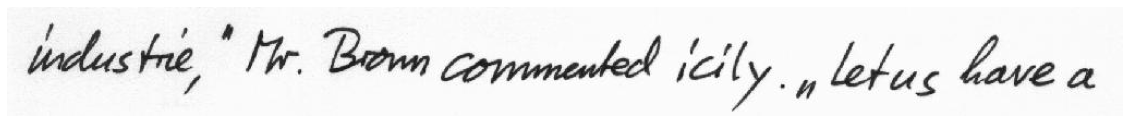

['industry , " Mr. Brown commented icily . " Let us have a']


In [70]:
from torch_snippets import *
im = read('../data/sample.jpg')
show(im)
y = inferencor.predict(im)
print(y)